<a href="https://colab.research.google.com/github/rennyatwork/CegepSteFoy_IA/blob/main/example_book_steven_dascoli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
#import tensorflow.keras.optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasRegressor
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import keras as keras
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.callbacks import ModelCheckpoint

In [ ]:
#!pip install tensorflow

In [2]:
path_csv = "https://raw.githubusercontent.com/stevedas/aiBook/main/crimeSTATS.csv"
crime_data = pd.read_csv(path_csv, sep =",")

In [3]:
crime_data.head()

,total_crime_reported_per_1_million_res,annual_police_funding_per_res,%_high_school_25yearsPlus,%_16_to_19_not_in_HS,%_18_to_24_in_college,%_college_degree
0,478,40,74,11,31,20
1,494,32,72,11,43,18
2,643,57,70,18,16,16
3,341,31,71,11,25,19
4,773,67,72,9,29,24


In [65]:
## train test split
def get_train_test(pDf=crime_data, p_var_y='total_crime_reported_per_1_million_res', p_test_size=0.2, p_random_state=25):
  dfX = pDf.drop(p_var_y, axis=1).values
  dfY = pDf[p_var_y]

  # Apply standardization to feature values
  scaler = StandardScaler()
  dfX_standardized = scaler.fit_transform(dfX)

  X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=p_test_size, random_state=p_random_state)
  X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=p_test_size, random_state=p_random_state)

  return X_train, X_valid, X_test, y_train, y_valid, y_test


In [7]:
## create model
def create_model (p_learning_rate, p_dropout_rate, pDfX, p_nb_neuron_input=128, p_activation='relu'):
  model = Sequential()
  model.add(Dense(p_nb_neuron_input, input_dim=pDfX.shape[1], activation=p_activation))
  model.add(Dropout(p_dropout_rate))
  model.add(Dense(int(p_nb_neuron_input/2), activation=p_activation))
  model.add(Dropout(p_dropout_rate))
  model.add(Dense(int(p_nb_neuron_input/4), activation=p_activation))
  model.add(Dropout(p_dropout_rate))
  model.add(Dense(1))

  adam = Adam(lr = p_learning_rate)

  model.compile( loss='mean_squared_error', optimizer=adam, metrics=['mae'])
  return model


In [178]:
## build model (Handos -on ML, Aurélien Géron)
def build_model (p_input_shape,
                 p_n_hidden=1,
                 p_n_neurons=30,
                 p_learning_rate=3e-3,
                 p_activation='relu'):
  model = Sequential()
  model.add(keras.layers.InputLayer(input_shape=p_input_shape))
  for layer in range(p_n_hidden):
    model.add(keras.layers.Dense(p_n_neurons, activation=p_activation))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr=p_learning_rate)
  model.compile(loss='mse', optimizer = optimizer, metrics=['mae', 'accuracy'])
  return model

In [179]:
## getting train, test sets
X_train, X_valid, X_test, y_train, y_valid,  y_test = get_train_test()

In [180]:
model = create_model (0.01, 0.3, X_train)

In [181]:
def plot_graph(p_model_history):
    # Plot MAE
    plt.plot(p_model_history['mae'])
    plt.plot(p_model_history['val_mae'])

    # Plot loss
    plt.plot(p_model_history['loss'])
    plt.plot(p_model_history['val_loss'])

    # Add labels and legends for MAE and loss
    plt.legend(['train MAE', 'test MAE', 'train loss', 'test loss'], loc='upper right')
    plt.title('Model Metrics')
    plt.ylabel('Metrics')
    plt.xlabel('Epoch')
    plt.show()

    # Plot accuracy (if applicable)
    if 'accuracy' in p_model_history:
        plt.plot(p_model_history['accuracy'])
        plt.plot(p_model_history['val_accuracy'])

        # Add labels and legends for accuracy
        plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.show()


In [182]:
def do_analysis(pModel, pXTrain, pYTrain, pXTest, pYTest,
                p_dropout_rate =0.3, p_learning_rate=0.01, p_epochs =30, p_batch_size=10,
                p_validation_split=0.2, p_verbose=True, p_plot_graph=1):
  model_history = pModel.fit(pXTrain, pYTrain, batch_size=p_batch_size, epochs=p_epochs, validation_split = p_validation_split, verbose=1)

  ## evaluate model's accuracy (use TEST vars, NOT TRAIN)
  score = pModel.evaluate(pXTest, pYTest, verbose=p_verbose)

  print("[Loss]: ", score[0])
  print("[Mean Abs Error]: ", score[1])

  if(p_plot_graph):
    plot_graph(model_history.history)


Epoch 1/5
3/3 [==============================] - 1s 91ms/step - loss: 648507.3750 - mae: 730.6348 - val_loss: 449966.4375 - val_mae: 654.0579
Epoch 2/5
3/3 [==============================] - 0s 18ms/step - loss: 640224.2500 - mae: 724.2595 - val_loss: 441431.8125 - val_mae: 647.6407
Epoch 3/5
3/3 [==============================] - 0s 18ms/step - loss: 626694.3125 - mae: 715.5538 - val_loss: 433255.0000 - val_mae: 641.4189
Epoch 4/5
3/3 [==============================] - 0s 17ms/step - loss: 621445.6250 - mae: 711.5172 - val_loss: 426029.0312 - val_mae: 635.8742
Epoch 5/5
3/3 [==============================] - 0s 18ms/step - loss: 613075.6875 - mae: 706.3947 - val_loss: 418976.2188 - val_mae: 630.3969
[Loss]:  484143.59375
[Mean Abs Error]:  679.2936401367188


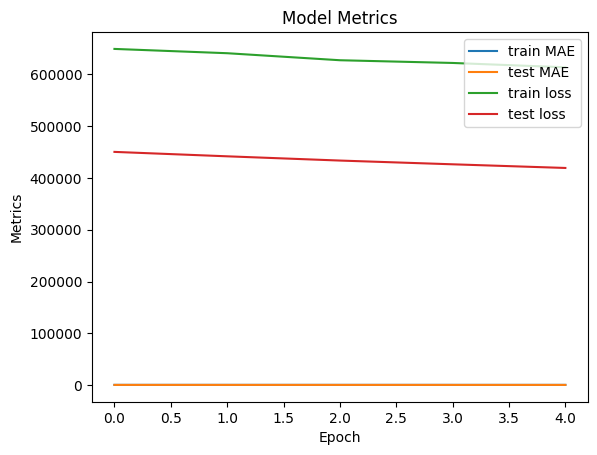

In [183]:
## Modele valuation
do_analysis(model, X_train, y_train, X_test, y_test, p_epochs=5, p_verbose=0)

In [184]:
# Split your data and define input_shape
input_shape = X_train.shape[1]  # Number of features

# Create the KerasRegressor with your build_model function
keras_reg = KerasRegressor(build_fn=build_model, p_input_shape=input_shape, p_n_hidden=1, p_n_neurons=30, p_learning_rate=3e-3, p_activation='relu')


<ipython-input-184-a7b188dfa79d>:5: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=build_model, p_input_shape=input_shape, p_n_hidden=1, p_n_neurons=30, p_learning_rate=3e-3, p_activation='relu')


In [185]:
keras_reg.fit( X_train, y_train, epochs = 100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

msa_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 518ms/step - loss: 647633.3125 - mae: 743.6051 - accuracy: 0.0000e+00 - val_loss: 1322419093504.0000 - val_mae: 1142897.1250 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 54ms/step - loss: 1533233594368.0000 - mae: 1222030.3750 - accuracy: 0.0000e+00 - val_loss: 66041604.0000 - val_mae: 8119.3477 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 59ms/step - loss: 64630084.0000 - mae: 8033.4102 - accuracy: 0.0000e+00 - val_loss: 65261204.0000 - val_mae: 8071.1465 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 52ms/step - loss: 63857968.0000 - mae: 7985.2090 - accuracy: 0.0000e+00 - val_loss: 64490104.0000 - val_mae: 8023.2354 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 63095104.0000 - mae: 7937.2979 - accuracy: 0.0000e+00 - val_loss: 63728176.0000 - val_mae: 7975.6113 - val_accuracy: 0.0000e+0

In [186]:
# Define the checkpoint callback
checkpoint_cb = ModelCheckpoint(filepath="best_model.h5", save_best_only=True)

# Other callbacks you might have (e.g., EarlyStopping)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

param_distribs = {
    "p_n_hidden": [0,1,2,3],
    "p_n_neurons": np.arange(1,100),
    "p_learning_rate" : reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=5, cv=3)

rnd_search_cv.fit(X_train, y_train, epochs=20,
                  validation_data=(X_valid, y_valid),
                  callbacks=[checkpoint_cb, early_stopping_cb])

# Access the best model and print its summary
best_model = rnd_search_cv.best_estimator_.model
best_model.summary()



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 547ms/step - loss: 640574.3750 - mae: 728.7546 - accuracy: 0.0000e+00 - val_loss: 334219584.0000 - val_mae: 18143.3184 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 55ms/step - loss: 394884160.0000 - mae: 19631.5508 - accuracy: 0.0000e+00 - val_loss: 242933252096.0000 - val_mae: 489840.5625 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 38ms/step - loss: 281333628928.0000 - mae: 523872.0000 - accuracy: 0.0000e+00 - val_loss: 172973549944832.0000 - val_mae: 13070196.0000 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 56ms/step - loss: 200465451057152.0000 - mae: 13984200.0000 - accuracy: 0.0000e+00 - val_loss: 123256730942439424.0000 - val_mae: 348897856.0000 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 58ms/step - loss: 142842503366705152.0000 - mae: 373290112.0000 - accuracy: 0.0000e+00 - val_loss: 878270185019

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [-1.17349731e+37             nan             nan            -inf
 -3.98636203e+08]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:961: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


1/1 [==============================] - 0s 500ms/step - loss: 633809.1250 - mae: 733.1466 - accuracy: 0.0000e+00 - val_loss: 4186720698368.0000 - val_mae: 2033575.1250 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 53ms/step - loss: 4855939727360.0000 - mae: 2174751.0000 - accuracy: 0.0000e+00 - val_loss: 192534368.0000 - val_mae: 13871.4307 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 77ms/step - loss: 190136576.0000 - mae: 13785.5781 - accuracy: 0.0000e+00 - val_loss: 190240240.0000 - val_mae: 13788.4902 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 52ms/step - loss: 187856688.0000 - mae: 13702.6377 - accuracy: 0.0000e+00 - val_loss: 187973568.0000 - val_mae: 13706.0488 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 67ms/step - loss: 185604160.0000 - mae: 13620.1963 - accuracy: 0.0000e+00 - val_loss: 185733984.0000 - val_mae: 13624.1035 - val_accuracy:

In [194]:
def plot_graph_2(histories):
    # Iterate over each history and plot metrics
    for history in histories:
        plt.figure(figsize=(10, 6))

        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(history['loss'])
        plt.plot(history['val_loss'])
        plt.legend(['train loss', 'test loss'], loc='upper right')
        plt.title('Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')

        # Plot accuracy (if available)
        if 'mae' in history:
            plt.subplot(1, 2, 2)
            plt.plot(history['mae'])
            plt.plot(history['val_mae'])
            plt.legend(['train mae', 'test mae'], loc='upper right')
            plt.title('MAE')
            plt.ylabel('MAE')
            plt.xlabel('Epoch')


        if 'accuracy' in history:
            plt.subplot(1, 2, 2)
            plt.plot(history['accuracy'])
            plt.plot(history['val_accuracy'])
            plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
            plt.title('Accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')

        plt.tight_layout()
        plt.show()




Epoch 1/30
1/1 [==============================] - 0s 87ms/step - loss: 9620832.0000 - mae: 3086.4902 - accuracy: 0.0000e+00 - val_loss: 10064073.0000 - val_mae: 3153.7729 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 66ms/step - loss: 9506546.0000 - mae: 3067.9209 - accuracy: 0.0000e+00 - val_loss: 9947989.0000 - val_mae: 3135.3149 - val_accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 0s 47ms/step - loss: 9393631.0000 - mae: 3049.4626 - accuracy: 0.0000e+00 - val_loss: 9833278.0000 - val_mae: 3116.9680 - val_accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 0s 68ms/step - loss: 9282072.0000 - mae: 3031.1157 - accuracy: 0.0000e+00 - val_loss: 9719926.0000 - val_mae: 3098.7314 - val_accuracy: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 0s 74ms/step - loss: 9171849.0000 - mae: 3012.8792 - accuracy: 0.0000e+00 - val_loss: 9607913.0000 - val_mae: 3080.6045 - val_accuracy: 0.0000e+00
Epoch 6/30
1/1

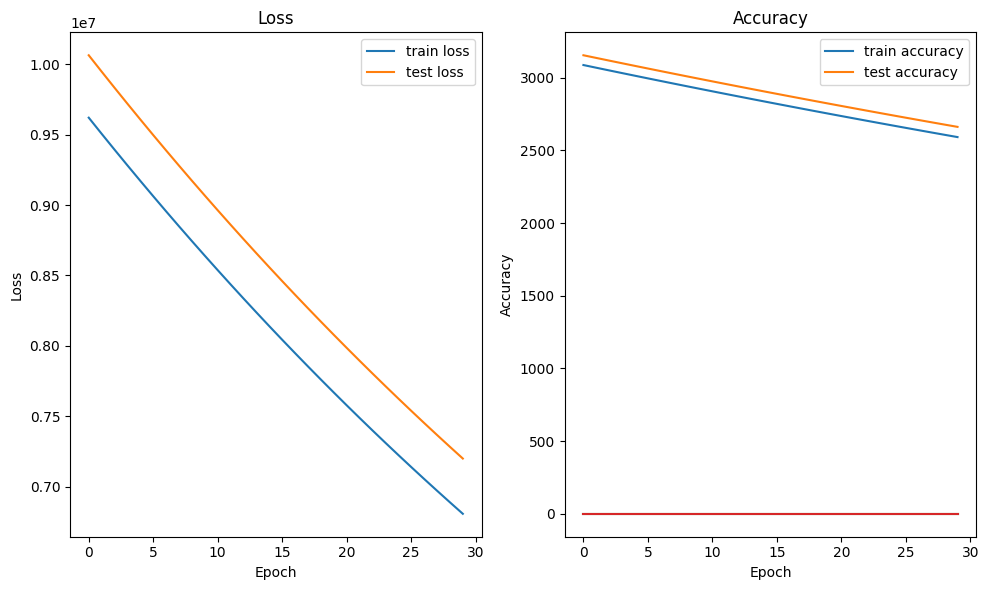

In [195]:
# Train the best model with all available data
best_model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

# Get the history of the best model
best_model_history = best_model.history.history

# Plot the metrics of the best model
plot_graph_2([best_model_history])

In [163]:
type(best_model_history)
for key in (best_model_history):
  print('[key]: ', key)



[key]:  loss
[key]:  val_loss
